In [1]:
__author__ = "@Tssp"
__date__   = "26/12/20"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18
aur = (1 + np.sqrt(5)) / 2
aursize = (4.3*aur, 4.3)

In [2]:
delta = np.loadtxt('Simulations/delta_asc.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [3]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [4]:
np.sqrt(5505/4993)

1.0500207431214774

In [5]:
print(os.getcwd())
folder_path = "Simulations/ix5505_iy4993_iz4993/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q3d


In [6]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x10000_y10000_z10000_120rm8g2l60m14_68CM8g1L60M14_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix5505_iy4993_iz4993_LiLi_a3Sup_0{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_int_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.70500', '.707666', '.707891', '.7081066', '.7083468', '.708483', '.708822', '.7090032', '.7090948', '.7092404', '.7091583'] non readed


In [7]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [8]:
dic = transpose_energies(Data)

In [9]:
least_bound_pos = 1000

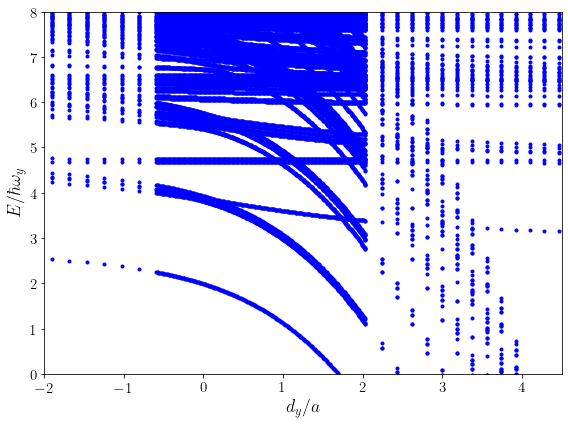

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 100):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'b.')
#ax.plot(x, dic['nivel_1004']/wy, 'r')
ax.set_ylim(0, 8)
ax.set_xlim(-2, 4.5)
ax.set_xlabel('$d_{y}/a$')
ax.set_ylabel('$E/\hbar \omega_{y}$')
plt.tight_layout()
fig.savefig('Results/Figures/Ix5505_Iy4993_Iz4993_Easc.png', dpi=200)
plt.show()

# Crosses

In [11]:
%matplotlib inline

## Resonance x=0

1001
1002
1003


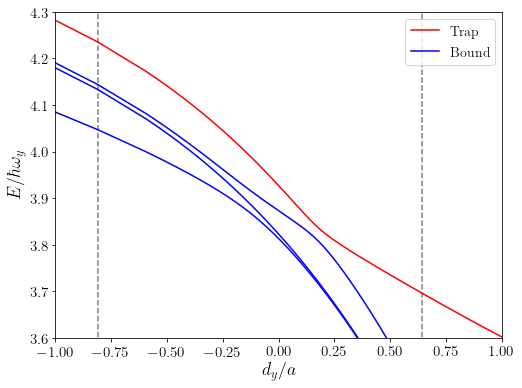

In [12]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
ax2.plot(x, dic['nivel_1004']/wy, 'r', label='trap')
for i in range(least_bound_pos+1, least_bound_pos + 4):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b', label='Data')
ax2.vlines(x[-20], 3.5, 4.3, alpha=0.5, linestyles='--')
ax2.vlines(x[-140], 3.5, 4.3, alpha=0.5, linestyles='--')
ax2.set_ylim(3.6, 4.3)
ax2.set_xlim(-1, 1)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Trap', 'Bound'], fontsize=14)
#plt.savefig('Results/Figures/Ix5505_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [13]:
dic['nivel_1000'][-19]/wy

2.3724807599483677

In [14]:
print(f'''To find the eigenstates:
x={x[-19]}, delta=0{delta[-19]}
x={x[-140]}, delta=0{delta[-140]}''')

To find the eigenstates:
x=-1.0265673569128972, delta=0.72000
x=0.6440662433463065, delta=0.71205


## Resonance x>1

1005
1006
1007
1008
1009
1010


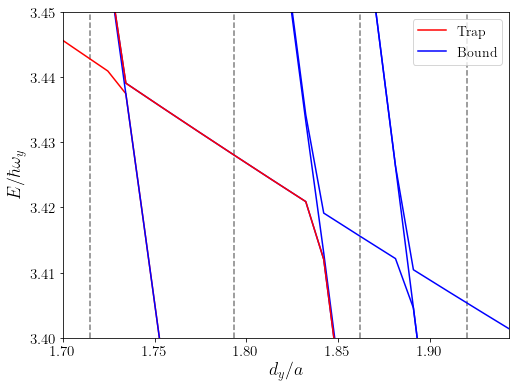

In [15]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
ax2.plot(x, dic['nivel_1004']/wy, 'r')
for i in range(least_bound_pos+5, least_bound_pos + 11):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_1006']/wy, 'r')
ax2.vlines(x[48], 3.4, 3.45, alpha=0.5, linestyles='--')
ax2.vlines(x[40], 3.4, 3.45, alpha=0.5, linestyles='--')
ax2.vlines(x[33], 3.4, 3.45, alpha=0.5, linestyles='--')
ax2.vlines(x[27], 3.4, 3.45, alpha=0.5, linestyles='--')
ax2.set_ylim(3.40, 3.45)
ax2.set_xlim(1.7, 1.943)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Trap', 'Bound'], fontsize=14)
#plt.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [16]:
print(f'''To find the eigenstates:
x={x[48]}, delta=0{delta[48]}
x={x[40]}, delta=0{delta[40]}
x={x[33]}, delta=0{delta[33]}
x={x[27]}, delta=0{delta[27]}''')

To find the eigenstates:
x=1.7147058246282152, delta=0.70670
x=1.7931335608113992, delta=0.70630
x=1.8615783192707642, delta=0.70595
x=1.920112552344598, delta=0.70565


In [19]:
%matplotlib

Using matplotlib backend: MacOSX


In [20]:
fig2, ax2 = plt.subplots(figsize=aursize)
for i in range(least_bound_pos+4, least_bound_pos + 11):
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.set_ylim(3.40, 3.45)
ax2.set_xlim(1.7, 1.943)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.grid()
xcoord = []
ycoord = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    plt.plot(ix, iy, 'ro', markersize=4)
    plt.draw()
    global xcoord, ycoord
    xcoord.append(ix)
    ycoord.append(iy)
    if len(xcoord) == 30:
        fig2.canvas.mpl_disconnect(cid)
        print(f'xcoord: {xcoord}\n ycoord: {ycoord}')
    return xcoord, ycoord
cid = fig2.canvas.mpl_connect('button_press_event', onclick)
plt.show()

xcoord: [1.700651055621048, 1.7024740113599828, 1.704817811595756, 1.7085939341978351, 1.7153649126567354, 1.7218754688672167, 1.740495659629193, 1.7489593827028185, 1.7580741613974922, 1.7660170399742792, 1.7718765405637122, 1.7782568856499839, 1.7820330082520628, 1.7876320865930768, 1.7967468652877505, 1.8115909334476474, 1.822138034508627, 1.8462270924874074, 1.8543001821884042, 1.863414960883078, 1.8714880505840745, 1.892842674954453, 1.8970094309291607, 1.9013063980280784, 1.905212731754367, 1.909379487729075, 1.912895188082735, 1.915629621691137, 1.9190151109205873, 1.9227912335226662]
 ycoord: [3.445507588053406, 3.4451521757158594, 3.44467829259913, 3.443908232534445, 3.4427235247426218, 3.4414795815612074, 3.4377477520169646, 3.4362668672771854, 3.4344305701998596, 3.432949685460081, 3.4321796253953956, 3.431172623772346, 3.430402563707661, 3.429277091305429, 3.4273223234489207, 3.424893672475683, 3.4228204338399926, 3.4185554857894296, 3.4170153656600593, 3.4154752455306894, 

In [21]:
%matplotlib inline

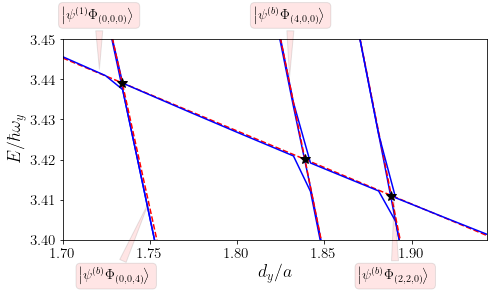

In [22]:
fig3, ax3 = plt.subplots(figsize=aursize)
# nivel 1004:
f1004 = np.polyfit(xcoord, ycoord, deg=1)
x1004 = np.linspace(1.7, 1.95, num=40)
ax3.plot(x1004, np.polyval(f1004, x1004), 'r--', markersize=4, label='Diabetic')
ax3.plot(x, dic['nivel_1004']/wy, 'b', label='Adiabatic')

# nivel 1005:
ax3.plot(x, dic['nivel_1005']/wy, 'b')

# nivel 1006:
ax3.plot(x, dic['nivel_1006']/wy, 'b')
f1006 = np.polyfit(x[(x < 1.74) & (x > 1.7)], np.array(dic['nivel_1006'])[(x < 1.74) & (x > 1.7)]/wy, deg=1)
x1006 = np.linspace(1.7, 1.76, num=500)
ax3.plot(x1006, np.polyval(f1006, x1006), 'r--', markersize=4)

# nivel 1007:
ax3.plot(x, dic['nivel_1007']/wy, 'b')

# nivel 1008:
ax3.plot(x, dic['nivel_1008']/wy, 'b')
f1008 = np.polyfit(x[(x < 1.84) & (x > 1.82)], np.array(dic['nivel_1008'])[(x < 1.84) & (x > 1.82)]/wy, deg=1)
x1008 = np.linspace(1.8, 1.86, num=500)
ax3.plot(x1008, np.polyval(f1008, x1008), 'r--', markersize=4)

# nivel 1009:
ax3.plot(x, dic['nivel_1009']/wy, 'b')

# nivel 1010:
f1010 = np.polyfit(x[(x < 1.88) & (x > 1.82)], np.array(dic['nivel_1010'])[(x < 1.88) & (x > 1.82)]/wy, deg=1)
x1010 = np.linspace(1.82, 1.95, num=500)
ax3.plot(x1010, np.polyval(f1010, x1010), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1010']/wy, 'b')

# Crosses:
##########
ax3.plot(cross_points(f1004, f1006), np.polyval(f1004, cross_points(f1004, f1006)), 'k*', markersize=10, label='ICIR')
ax3.plot(cross_points(f1004, f1008), np.polyval(f1004, cross_points(f1004, f1008)), 'k*', markersize=10)
ax3.plot(cross_points(f1004, f1010), np.polyval(f1004, cross_points(f1004, f1010)), 'k*', markersize=10)

# States:
#########
ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.721, 3.442), xytext=(1.70, 3.455), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,4)}\right>$', xy=(1.75, 3.41), xytext=(1.71, 3.39), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(4,0,0)}\right>$', xy=(1.83, 3.44), xytext=(1.81, 3.455), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,4,0)}\right>$', xy=(1.78, 3.368), xytext=(1.75, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,2)}\right>$', xy=(1.843, 3.38), xytext=(1.80, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,2)}\right>$', xy=(1.843, 3.38), xytext=(1.85, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,2,0)}\right>$', xy=(1.89, 3.41), xytext=(1.87, 3.39), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))


ax3.set_xlabel('$d_{y}/a$')
ax3.set_ylabel('$E/\hbar \omega_{y}$')
#ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.set_ylim(3.40, 3.45)
ax3.set_xlim(1.7, 1.943)
plt.tight_layout()
fig3.savefig('Results/Figures/Ix5505_Iy4993_Iz4993_Easc_Interpolation_v2.png', bbox_inches="tight", dpi=200)

In [23]:
print(f'''Crosses between (x, E):
* 1004-1006: ({cross_points(f1004, f1006)}, {np.polyval(f1004, cross_points(f1004, f1006))})
* 1004-1008: ({cross_points(f1004, f1008)}, {np.polyval(f1004, cross_points(f1004, f1008))})
* 1004-1010: ({cross_points(f1004, f1010)}, {np.polyval(f1004, cross_points(f1004, f1010))})''')

Crosses between (x, E):
* 1004-1006: (1.7340926275926276, 3.4391054572646116)
* 1004-1008: (1.838839188218169, 3.420043664845695)
* 1004-1010: (1.8883991606144757, 3.4110247347685267)


In [24]:
print(f"ICIR: asc/dy = {1/cross_points(f1004, f1006)}\nasc = {1/cross_points(f1004, f1006) * dho}")

ICIR: asc/dy = 0.5766704639003399
asc = 1002.0635248889769


In [25]:
np.savetxt('Results/ICIR_positions_5505_4993_4993.txt', 
           [[1.05, 1.05, 1.05], [1/cross_points(f1004, f1006), 1/cross_points(f1004, f1008), 1/cross_points(f1004, f1010)], 
            [np.polyval(f1004, cross_points(f1004, f1006)), np.polyval(f1004, cross_points(f1004, f1008)), np.polyval(f1004, cross_points(f1004, f1010))]], 
           header='wx/wy, asc/dy, E/hwy', )